In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results.csv')
df.fillna(0)

df

,test,syscall,calls,total_time_s
0,baseline,clone,9792,2.179638
1,baseline,kill,2000,0.009894
2,baseline,execve,1,0.000451
3,baseline,total,11793,2.189983
4,baseline,clone,9747,2.347312
...,...,...,...,...
595,after_remove,total,11359,2.387530
596,after_remove,clone,9671,2.501163
597,after_remove,kill,2000,0.010052
598,after_remove,execve,1,0.000000


<Figure size 640x480 with 0 Axes>

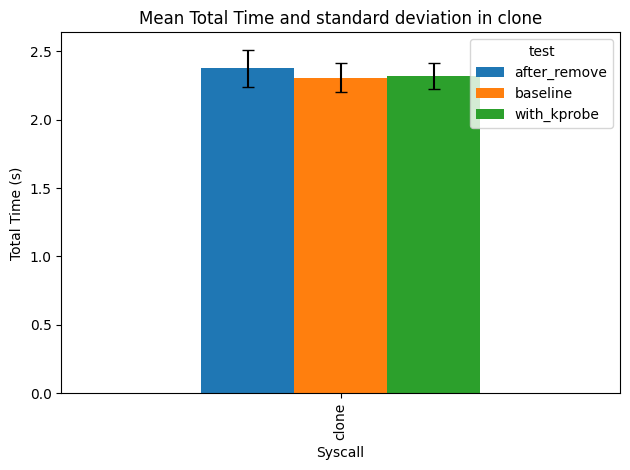

<Figure size 640x480 with 0 Axes>

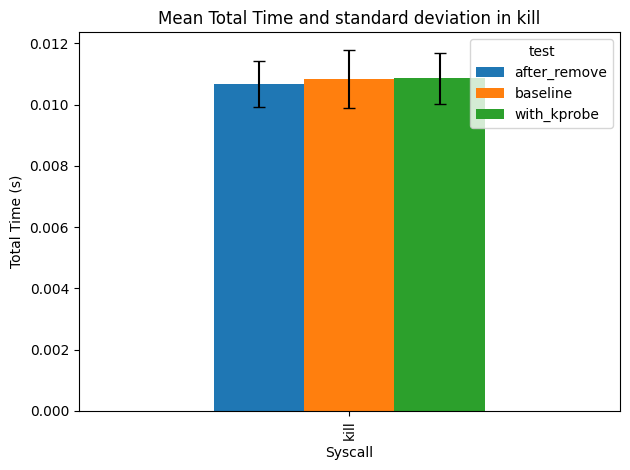

<Figure size 640x480 with 0 Axes>

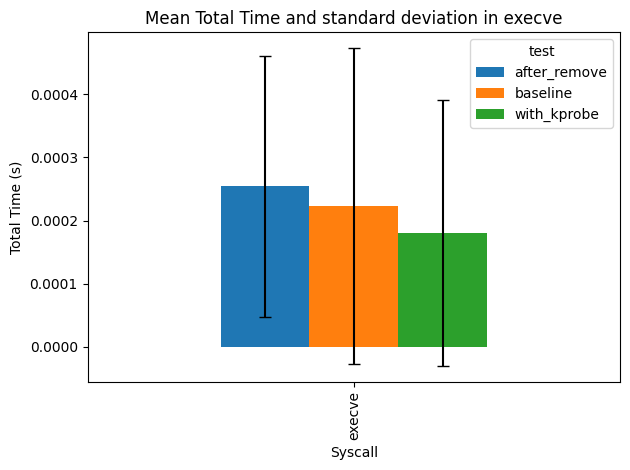

<Figure size 640x480 with 0 Axes>

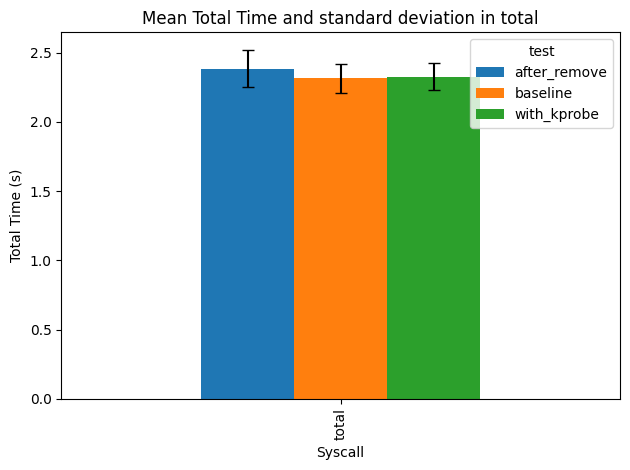

In [29]:
# Fix the bug, the last col wasn't valid float


agg = df.groupby(['test', 'syscall']).agg(
    mean_time_s=('total_time_s', 'mean'),
    std_time_s=('total_time_s', 'std'),
).reset_index()


def plot(name):
    # Pivots for plotting
    
    df_clone = df[df['syscall'] == name].groupby(['test', 'syscall']).agg(
        mean_time_s=('total_time_s', 'mean'),
        std_time_s=('total_time_s', 'std'),
    ).reset_index()
    
    pivot_time = df_clone.pivot(index='syscall', columns='test', values='mean_time_s')
    pivot_time_std = df_clone.pivot(index='syscall', columns='test', values='std_time_s')

    # Plot mean total time
    plt.figure()
    pt = pivot_time.plot(kind='bar', yerr=pivot_time_std, capsize=4)
    pt.set_title(f'Mean Total Time and standard deviation in {name}')
    pt.set_xlabel('Syscall')
    pt.set_ylabel('Total Time (s)')
    plt.tight_layout()
    plt.show()



plot('clone')
plot('kill')
plot('execve')
plot('total')
